#**PCOS ANALYTICS AND PREDICTION**


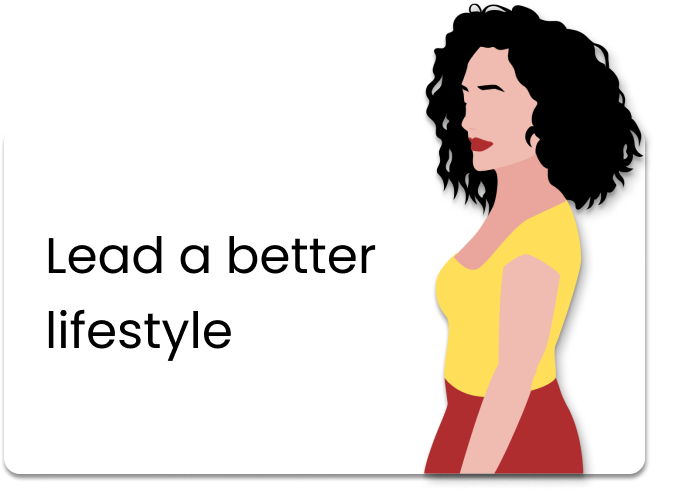

#**IMPORT THE REQUIRED PACKAGES LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import xgboost
from sklearn.neural_network import MLPClassifier
import plotly.graph_objects as go
import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#**IMPORT THE DATASET**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TARP/PCOS_infertility.csv')
data1= pd.read_excel('/content/drive/MyDrive/TARP/PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [ ]:
data1

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN


#**EXPLORATORY DATA ANALYSIS**

In [ ]:
data1.shape

(541, 45)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [ ]:
data1.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
data1.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

#**PREPROCESSING**

In [ ]:
data = pd.merge(data1,data, on='Patient File No.',how='left')

In [ ]:
data =data1.drop(['Unnamed: 44', 'Sl. No', '  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], axis=1)

In [ ]:
data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
data.columns

Index(['Patient File No.', 'Target', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
data.describe()

,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
data.shape

(541, 40)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient File No.       541 non-null    float64
 1   Target                 541 non-null    float64
 2    Age (yrs)             541 non-null    float64
 3   Weight (Kg)            541 non-null    float64
 4   Height(Cm)             541 non-null    float64
 5   BMI                    541 non-null    float64
 6   Blood Group            541 non-null    float64
 7   Pulse rate(bpm)        541 non-null    float64
 8   RR (breaths/min)       541 non-null    float64
 9   Hb(g/dl)               541 non-null    float64
 10  Cycle(R/I)             541 non-null    float64
 11  Cycle length(days)     541 non-null    float64
 12  Marraige Status (Yrs)  540 non-null    float64
 13  Pregnant(Y/N)          541 non-null    float64
 14  No. of aborptions      541 non-null    float64
 15  FSH(mI

In [ ]:
data.isnull().sum()

Patient File No.         0
Target                   0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

#**PERFORMING EDA**

In [ ]:
data.max()

Patient File No.          541.000000
Target                      1.000000
 Age (yrs)                 48.000000
Weight (Kg)               108.000000
Height(Cm)                180.000000
BMI                        38.900000
Blood Group                18.000000
Pulse rate(bpm)            82.000000
RR (breaths/min)           28.000000
Hb(g/dl)                   14.800000
Cycle(R/I)                  5.000000
Cycle length(days)         12.000000
Marraige Status (Yrs)      30.000000
Pregnant(Y/N)               1.000000
No. of aborptions           5.000000
FSH(mIU/mL)              5052.000000
LH(mIU/mL)               2018.000000
FSH/LH                   1372.826087
Hip(inch)                  48.000000
Waist(inch)                47.000000
Waist:Hip Ratio             0.979167
TSH (mIU/L)                65.000000
PRL(ng/mL)                128.240000
Vit D3 (ng/mL)           6014.660000
PRG(ng/mL)                 85.000000
RBS(mg/dl)                350.000000
Weight gain(Y/N)            1.000000
h

In [ ]:
data.min()

Patient File No.           1.000000
Target                     0.000000
 Age (yrs)                20.000000
Weight (Kg)               31.000000
Height(Cm)               137.000000
BMI                       12.417882
Blood Group               11.000000
Pulse rate(bpm)           13.000000
RR (breaths/min)          16.000000
Hb(g/dl)                   8.500000
Cycle(R/I)                 2.000000
Cycle length(days)         0.000000
Marraige Status (Yrs)      0.000000
Pregnant(Y/N)              0.000000
No. of aborptions          0.000000
FSH(mIU/mL)                0.210000
LH(mIU/mL)                 0.020000
FSH/LH                     0.002146
Hip(inch)                 26.000000
Waist(inch)               24.000000
Waist:Hip Ratio            0.755556
TSH (mIU/L)                0.040000
PRL(ng/mL)                 0.400000
Vit D3 (ng/mL)             0.000000
PRG(ng/mL)                 0.047000
RBS(mg/dl)                60.000000
Weight gain(Y/N)           0.000000
hair growth(Y/N)           0

In [ ]:
data.mean()

Patient File No.         271.000000
Target                     0.327172
 Age (yrs)                31.430684
Weight (Kg)               59.637153
Height(Cm)               156.484835
BMI                       24.311285
Blood Group               13.802218
Pulse rate(bpm)           73.247689
RR (breaths/min)          19.243993
Hb(g/dl)                  11.160037
Cycle(R/I)                 2.560074
Cycle length(days)         4.940850
Marraige Status (Yrs)      7.680926
Pregnant(Y/N)              0.380776
No. of aborptions          0.288355
FSH(mIU/mL)               14.601832
LH(mIU/mL)                 6.469919
FSH/LH                     6.904831
Hip(inch)                 37.992606
Waist(inch)               33.841035
Waist:Hip Ratio            0.891895
TSH (mIU/L)                2.981281
PRL(ng/mL)                24.321497
Vit D3 (ng/mL)            49.915874
PRG(ng/mL)                 0.610945
RBS(mg/dl)                99.835860
Weight gain(Y/N)           0.377079
hair growth(Y/N)           0

In [ ]:
data.median()

Patient File No.         271.000000
Target                     0.000000
 Age (yrs)                31.000000
Weight (Kg)               59.000000
Height(Cm)               156.000000
BMI                       24.238227
Blood Group               14.000000
Pulse rate(bpm)           72.000000
RR (breaths/min)          18.000000
Hb(g/dl)                  11.000000
Cycle(R/I)                 2.000000
Cycle length(days)         5.000000
Marraige Status (Yrs)      7.000000
Pregnant(Y/N)              0.000000
No. of aborptions          0.000000
FSH(mIU/mL)                4.850000
LH(mIU/mL)                 2.300000
FSH/LH                     2.169231
Hip(inch)                 38.000000
Waist(inch)               34.000000
Waist:Hip Ratio            0.894737
TSH (mIU/L)                2.260000
PRL(ng/mL)                21.920000
Vit D3 (ng/mL)            25.900000
PRG(ng/mL)                 0.320000
RBS(mg/dl)               100.000000
Weight gain(Y/N)           0.000000
hair growth(Y/N)           0

In [ ]:
data.skew()

Patient File No.          0.000000
Target                    0.738773
 Age (yrs)                0.354004
Weight (Kg)               0.515227
Height(Cm)                0.325193
BMI                       0.269115
Blood Group              -0.132627
Pulse rate(bpm)          -7.948497
RR (breaths/min)          1.234130
Hb(g/dl)                  0.744115
Cycle(R/I)                0.997662
Cycle length(days)        0.826791
Marraige Status (Yrs)     1.142180
Pregnant(Y/N)             0.492425
No. of aborptions         2.970831
FSH(mIU/mL)              23.244530
LH(mIU/mL)               23.234664
FSH/LH                   21.463644
Hip(inch)                -0.200873
Waist(inch)               0.194675
Waist:Hip Ratio          -0.350015
TSH (mIU/L)               9.790706
PRL(ng/mL)                2.441412
Vit D3 (ng/mL)           16.436558
PRG(ng/mL)               20.730654
RBS(mg/dl)                5.488676
Weight gain(Y/N)          0.508661
hair growth(Y/N)          1.018699
Skin darkening (Y/N)

#**REMOVING THE UNNECESSARY FEATURES**

In [ ]:

data = data.drop(["Patient File No."],axis = 1)

#**FILLING THE MISSING VALUES**

In [ ]:

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
data.columns = [col.strip() for col in data.columns]

In [ ]:
colors = ['#670067','#008080']

#**VISUALIZATION**

CATEGORICAL VARIABLE 

1)BAR PLOT 

In [ ]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

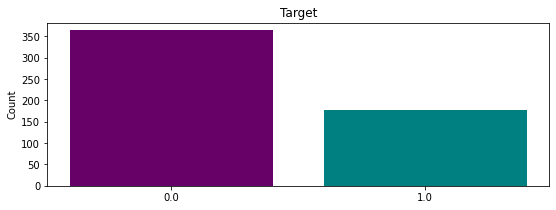

Target: 
 0.0    364
1.0    177
Name: Target, dtype: int64


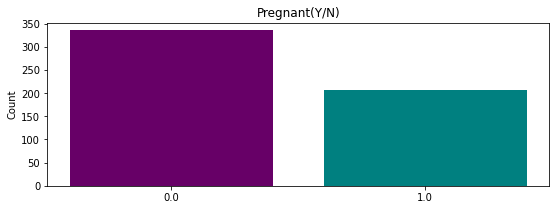

Pregnant(Y/N): 
 0.0    335
1.0    206
Name: Pregnant(Y/N), dtype: int64


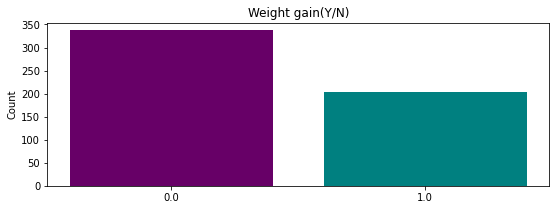

Weight gain(Y/N): 
 0.0    337
1.0    204
Name: Weight gain(Y/N), dtype: int64


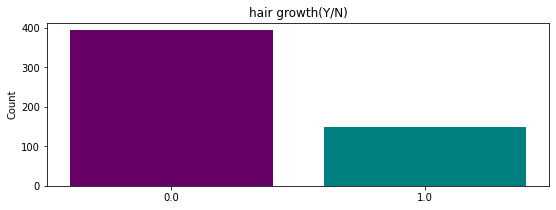

hair growth(Y/N): 
 0.0    393
1.0    148
Name: hair growth(Y/N), dtype: int64


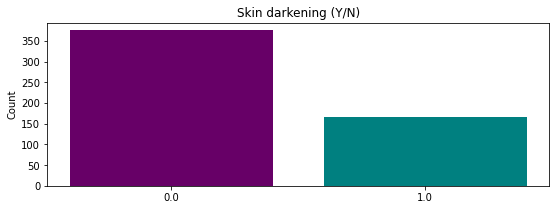

Skin darkening (Y/N): 
 0.0    375
1.0    166
Name: Skin darkening (Y/N), dtype: int64


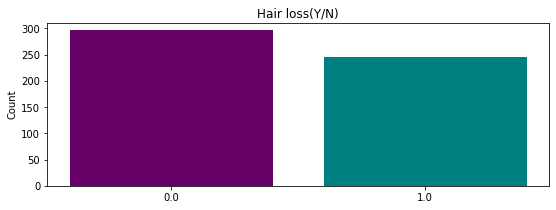

Hair loss(Y/N): 
 0.0    296
1.0    245
Name: Hair loss(Y/N), dtype: int64


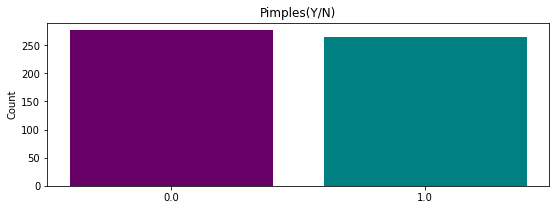

Pimples(Y/N): 
 0.0    276
1.0    265
Name: Pimples(Y/N), dtype: int64


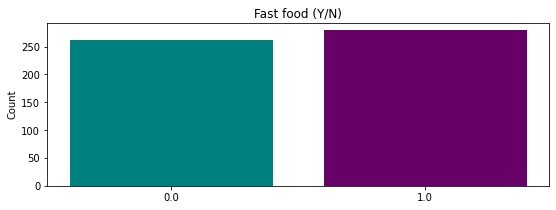

Fast food (Y/N): 
 1.0    279
0.0    262
Name: Fast food (Y/N), dtype: int64


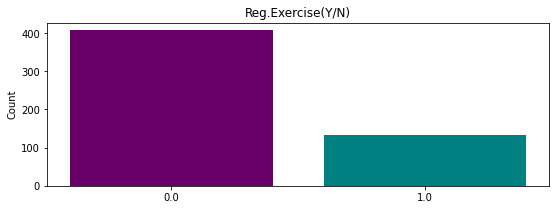

Reg.Exercise(Y/N): 
 0.0    407
1.0    134
Name: Reg.Exercise(Y/N), dtype: int64


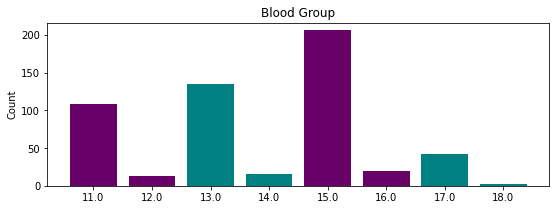

Blood Group: 
 15.0    206
13.0    135
11.0    108
17.0     42
16.0     19
14.0     16
12.0     13
18.0      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

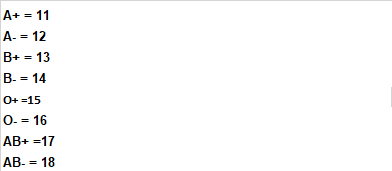

NUMERICAL VARIABLE 


2)HISTOGRAM 


In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

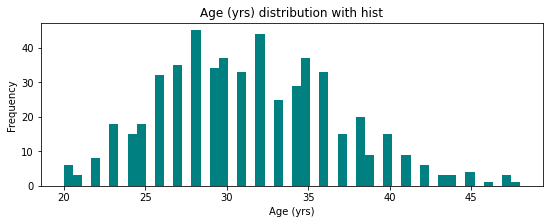

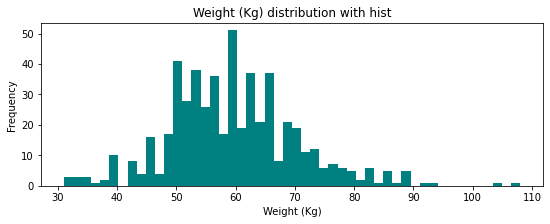

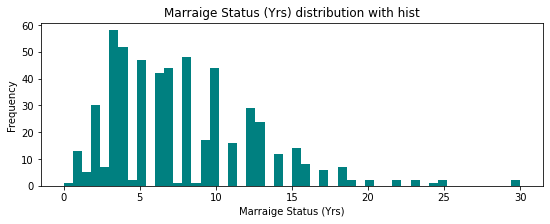

In [ ]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

CORRELATION MATRIX FOR ALL FEATURES

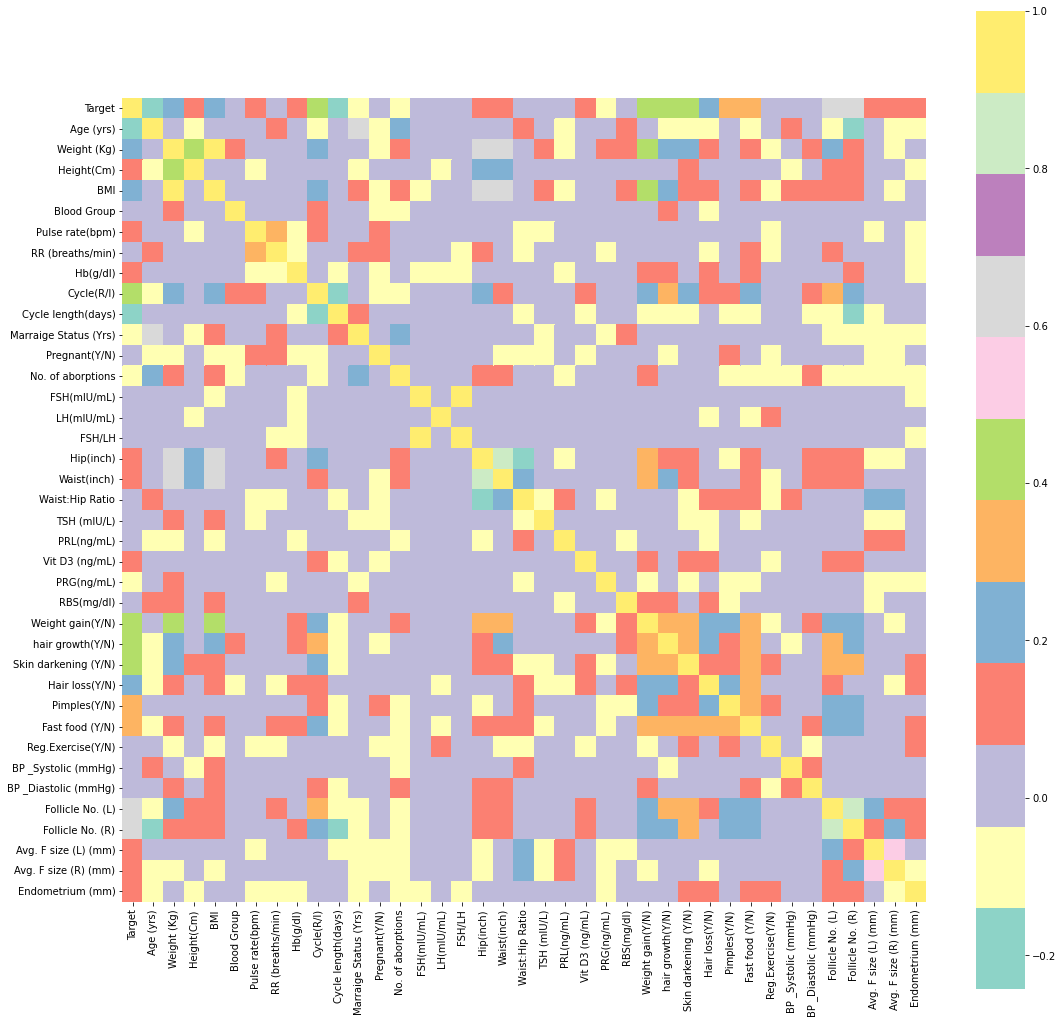

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

FEATURES BEARING SIGNIFICANT CORRELATION

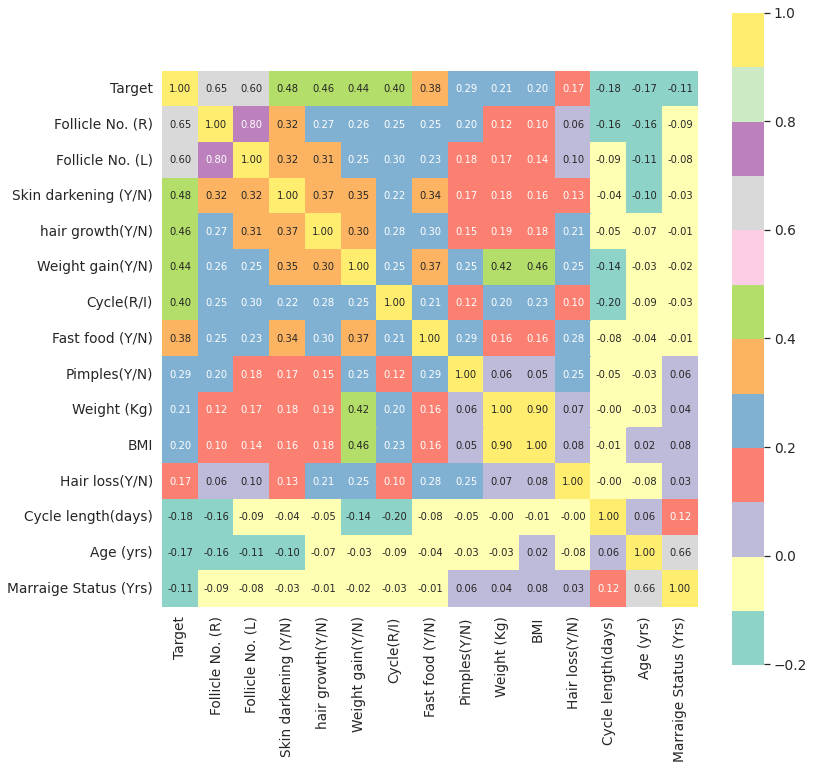

In [ ]:
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index 
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

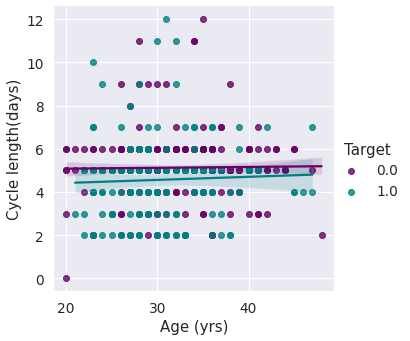

In [ ]:
# Length of menstrual phase in PCOS vs normal 

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)

FINDINGS:The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

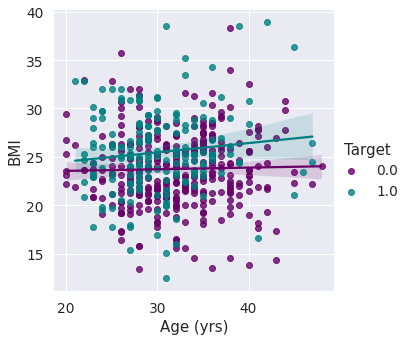

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

FINDINGS:Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

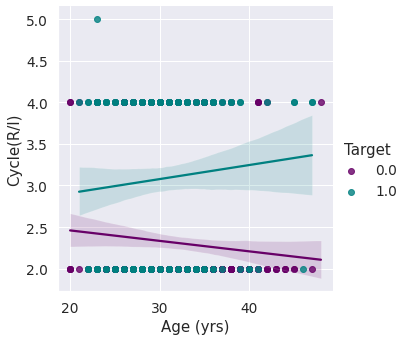

In [ ]:
# Cycle IR wrt age 

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

FINDINGS: The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

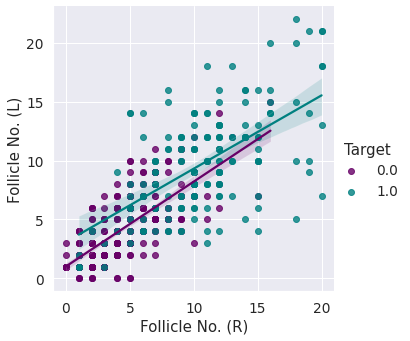

In [ ]:
# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

FINDINGS :
The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient.

3)BOXPLOT

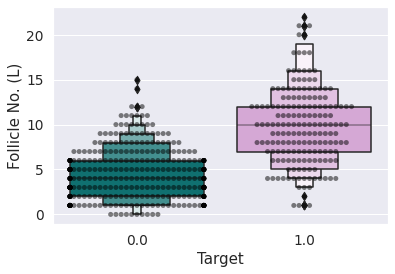

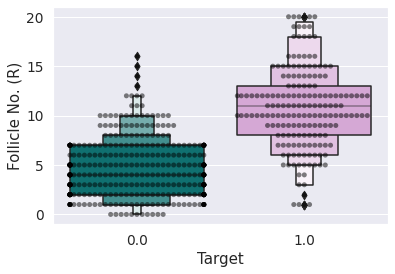

In [ ]:
color = ["teal", "plum"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

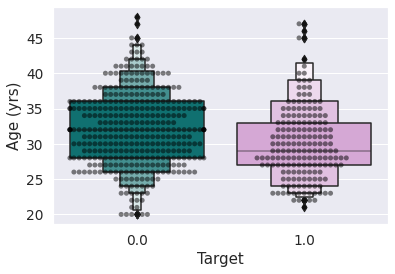

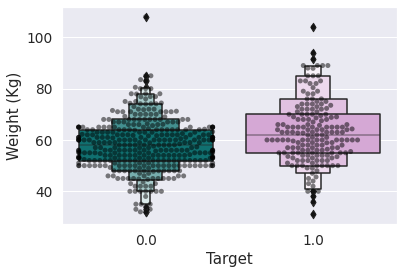

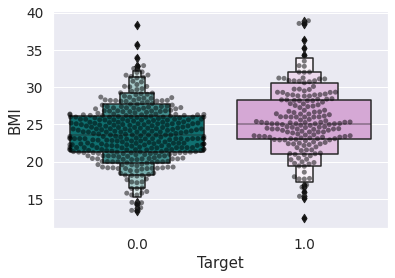

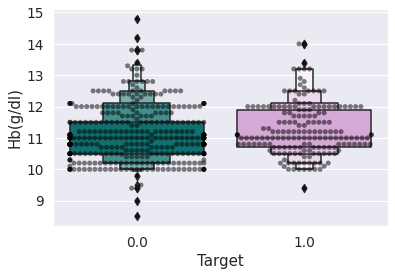

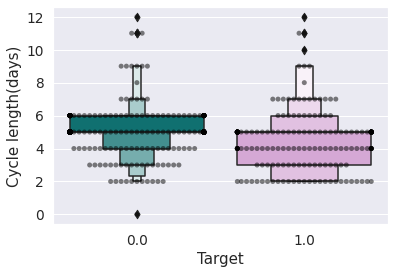

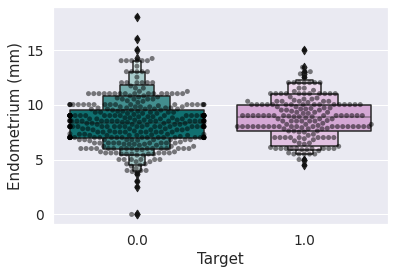

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

#**DATA MODELLING AND BUILDING THE MODEL**


#**SPLITTING INTO TRAINING AND TESTING DATA**

In [ ]:
 #Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [ ]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


GRID SEARCH:


Here, taking 6 Machine Learning classifiers and evaluating the mean accuracy of each of them by stratified cross validation.

Decision Tree

SVM

Random Forest

KNN

Logistic Regression

MLP Classifier

In [ ]:
random_state = 42
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 
# Setting up a primitive (non-validated) model
mlpc = MLPClassifier(random_state = 0)# ANN model object created

mlpc.fit(X_train, y_train) # ANN model object fit
classifier =[DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(), mlpc ]

# Decision Tree
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

#MLP CLASSIFER
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   mlpc_params]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
83.89
Fitting 10 folds for each of 28 candidates, totalling 280 fits
80.98
Fitting 10 folds for each of 48 candidates, totalling 480 fits
89.71
Fitting 10 folds for each of 14 candidates, totalling 140 fits
85.75
Fitting 10 folds for each of 40 candidates, totalling 400 fits
79.61
Fitting 10 folds for each of 54 candidates, totalling 540 fits
87.06


In [ ]:
best_estimators

[DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=9, n_estimators=500, random_state=42),
 LogisticRegression(C=0.1, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=11),
 MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(100, 100),
               random_state=0)]

In [ ]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]
mlp=best_estimators[5]

In [ ]:
#Get the predictions
#
y_pred = rf.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[107,   4],
       [  6,  46]])

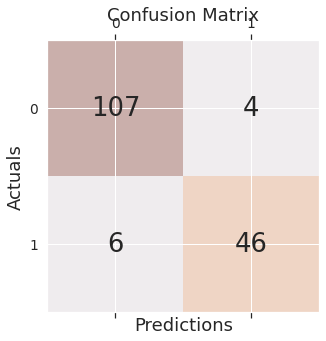

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

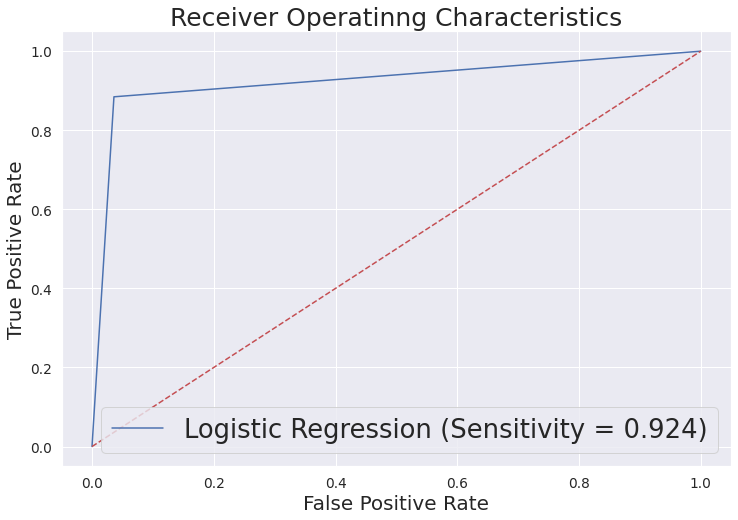

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()